In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
import datetime
from wordcloud import WordCloud, STOPWORDS

In [2]:
train_df = pd.read_csv('train.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_df.shape

(7613, 5)

In [6]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
train_df['keyword'] = train_df['keyword'].fillna('DUMMY_VALUE')
train_df.isna().sum()

id             0
keyword        0
location    2533
text           0
target         0
dtype: int64

In [9]:
train_df['keyword'].value_counts()

DUMMY_VALUE              61
fatalities               45
deluge                   42
armageddon               42
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

Next we will merge Keyword and text feature and use this combined feature for detecting disaster tweets.

In [10]:
train_df['final_text'] = train_df['keyword'] + train_df['text']


Next we will delete id, keyword and the location feature as it has large number of mising values and it also doesnt serve the purpose in detecting disaster tweets.

In [11]:
cols_del =['id','keyword','location']
train_df = train_df.drop(cols_del,axis=1)


In [12]:
train_df.head()

,text,target,final_text
0,Our Deeds are the Reason of this #earthquake M...,1,DUMMY_VALUEOur Deeds are the Reason of this #e...
1,Forest fire near La Ronge Sask. Canada,1,DUMMY_VALUEForest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...,1,DUMMY_VALUEAll residents asked to 'shelter in ...
3,"13,000 people receive #wildfires evacuation or...",1,"DUMMY_VALUE13,000 people receive #wildfires ev..."
4,Just got sent this photo from Ruby #Alaska as ...,1,DUMMY_VALUEJust got sent this photo from Ruby ...


### Class Distribution

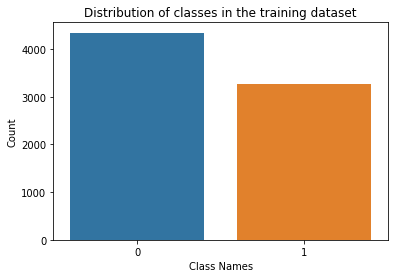

In [14]:
sns.countplot(x = 'target', data = train_df)
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Distribution of classes in the training dataset')
plt.show()

In [15]:
train_df['word_count'] = train_df.final_text.apply(len)
train_df.head()

,text,target,final_text,word_count
0,Our Deeds are the Reason of this #earthquake M...,1,DUMMY_VALUEOur Deeds are the Reason of this #e...,80
1,Forest fire near La Ronge Sask. Canada,1,DUMMY_VALUEForest fire near La Ronge Sask. Canada,49
2,All residents asked to 'shelter in place' are ...,1,DUMMY_VALUEAll residents asked to 'shelter in ...,144
3,"13,000 people receive #wildfires evacuation or...",1,"DUMMY_VALUE13,000 people receive #wildfires ev...",76
4,Just got sent this photo from Ruby #Alaska as ...,1,DUMMY_VALUEJust got sent this photo from Ruby ...,99


In [16]:
def cleaned_text(text):
    clean=re.sub("http\S+","",text)
    clean=re.sub("pic.twitter\S+","",clean)
    clean=re.sub("@\S+","",clean)
    clean = re.sub('#', '', clean)
    clean = re.sub('goooooooaaaaaal', 'goal', clean)
    clean = re.sub('SOOOO', 'SO', clean)
    clean = re.sub('LOOOOOOL', 'LOL', clean)
    clean = re.sub('Cooool', 'cool', clean)
    clean = re.sub('|', '', clean)
    clean = re.sub(r'\?{2,}', '? ', clean)
    clean = re.sub(r'\.{2,}', '. ', clean)
    clean = re.sub(r'\!{2,}', '! ', clean)
    clean = re.sub('&amp;', '&', clean)
    clean = re.sub('Comin', 'Coming', clean)
    clean = re.sub('&gt;', '> ', clean)
    clean = re.sub('&lt;', '< ', clean)
    clean = re.sub(r'.:', '', clean)
    clean = re.sub('baaaack', 'back', clean)
    clean = re.sub('RT', '', clean)
    clean = re.sub('\s{2,}', ' ', clean)
    clean = clean.lower()
    return clean
train_df['cleaned_text'] = train_df['final_text'].apply(cleaned_text)

In [17]:
train_df.head()

,text,target,final_text,word_count,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,DUMMY_VALUEOur Deeds are the Reason of this #e...,80,dummy_valueour deeds are the reason of this ea...
1,Forest fire near La Ronge Sask. Canada,1,DUMMY_VALUEForest fire near La Ronge Sask. Canada,49,dummy_valueforest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,1,DUMMY_VALUEAll residents asked to 'shelter in ...,144,dummy_valueall residents asked to 'shelter in ...
3,"13,000 people receive #wildfires evacuation or...",1,"DUMMY_VALUE13,000 people receive #wildfires ev...",76,"dummy_value13,000 people receive wildfires eva..."
4,Just got sent this photo from Ruby #Alaska as ...,1,DUMMY_VALUEJust got sent this photo from Ruby ...,99,dummy_valuejust got sent this photo from ruby ...


segregating disaster and normal tweets for plotting

In [18]:
train_disaster = train_df[train_df['target']==1]
train_normal = train_df[train_df['target']==0]

### Distribution of Word Count of Disaster Tweets

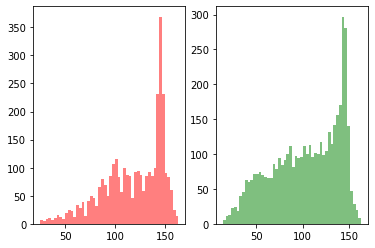

In [19]:

fig, ax = plt.subplots(1, 2)

disaster = train_disaster.word_count.to_list()
normal = train_normal.word_count.to_list()

ax[0].hist(disaster, bins=50, alpha = 0.5, color = 'r')
ax[1].hist(normal, bins=50, alpha = 0.5, color = 'g')

plt.show()

### Observation:

- Disaster tweets are comparatively shorter in length as compared to normal tweets in general

In [20]:
train_disaster.word_count.describe()

count    3271.000000
mean      117.563436
std        29.879465
min        25.000000
25%        97.000000
50%       124.000000
75%       144.000000
max       163.000000
Name: word_count, dtype: float64

In [21]:
train_disaster[train_disaster['word_count'] == 163]['cleaned_text'].iloc[0]

'bioterrorism if 90blks&8whts colluded 2 take wht f auth hostage&2 make her look blk w/bioterrorism&use her lgl/org idis id still hers?'

In [22]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    train_df['cleaned_text'] = train_df['cleaned_text'].str.replace(char, ' ')
    train_disaster['cleaned_text'] = train_disaster['cleaned_text'].str.replace(char, ' ')
    train_normal['cleaned_text'] = train_normal['cleaned_text'].str.replace(char, ' ')
   
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/opt/conda/l

In [23]:
train_df[train_df['word_count'] == 163]['cleaned_text'].iloc[0]

'bioterrorism if 90blks 8whts colluded 2 take wht f auth hostage 2 make her look blk w bioterrorism use her lgl org idis id still hers '

### Word cloud Disaster Tweets

In [24]:
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(' '.join(train_disaster['cleaned_text']))

<Figure size 432x288 with 0 Axes>

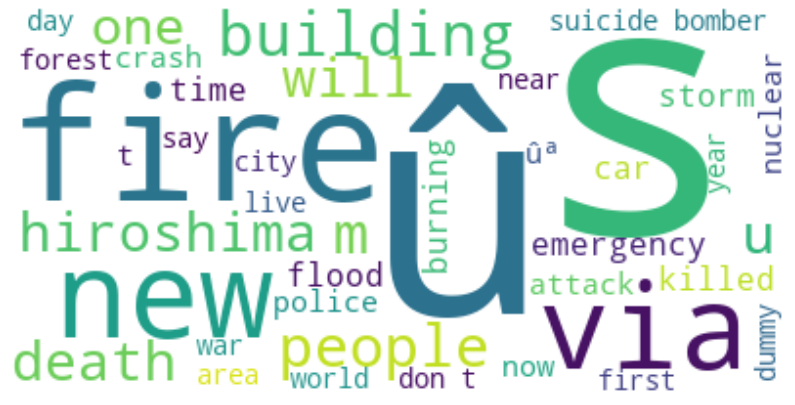

In [25]:
print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud Normal Tweets

<Figure size 432x288 with 0 Axes>

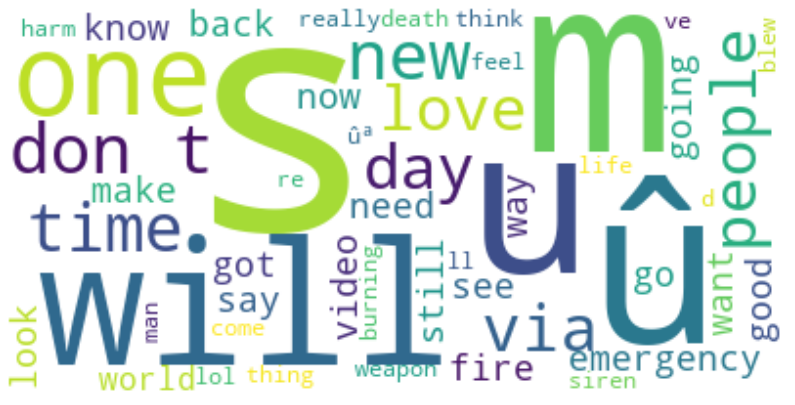

In [26]:
wordcloud = WordCloud(background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(' '.join(train_normal['cleaned_text']))
print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Observations

- From both the Word clouds we can easily see the difference between disaster and normal tweets

In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train_df, test_size=0.2)

### Bert Modelling

In [ ]:
!pip install transformers

In [29]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from pylab import rcParams
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Example sentence
sentence = "This is a test sentence."
inputs = tokenizer(sentence, return_tensors="tf")

# BERT output
outputs = bert_model(inputs)



np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [33]:

from transformers import BertTokenizer
import numpy as np
from tqdm import tqdm

class DisasterDetectionData:
    DATA_COLUMN = "cleaned_text"
    LABEL_COLUMN = "target"

    def __init__(self, train, test, tokenizer: BertTokenizer, classes, max_seq_len=192):
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len
        self.classes = classes

        # Prepare train and test data
        (self.train_x, self.train_y), (self.test_x, self.test_y) = map(self._prepare, [train, test])

        print("Max sequence length:", self.max_seq_len)

    def _prepare(self, df):
        x, y = [], []

        for _, row in tqdm(df.iterrows(), total=len(df)):
            text, label = row[DisasterDetectionData.DATA_COLUMN], row[DisasterDetectionData.LABEL_COLUMN]
            
            # Tokenize using Hugging Face tokenizer
            tokens = self.tokenizer.encode_plus(
                text,
                add_special_tokens=True,  # [CLS] and [SEP] tokens are added automatically
                max_length=self.max_seq_len,
                truncation=True,
                padding='max_length',     # Pad to max_seq_len
                return_tensors='np'       # Return NumPy arrays
            )
            
            input_ids = tokens['input_ids'].flatten()
            x.append(input_ids)
            y.append(self.classes.index(label))

        return np.array(x), np.array(y)

    def _pad(self, ids):
        # Padding is already handled by the tokenizer
        return ids

In [34]:
from transformers import BertTokenizer

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example: Tokenize a sentence
tokens = tokenizer.tokenize("I can't wait to visit Bulgaria again!")
print(tokens)


['i', 'can', "'", 't', 'wait', 'to', 'visit', 'bulgaria', 'again', '!']

In [35]:
tokens = tokenizer.tokenize("I can't wait to visit Bulgaria again!")
tokenizer.convert_tokens_to_ids(tokens)

[1045, 2064, 1005, 1056, 3524, 2000, 3942, 8063, 2153, 999]

In [37]:
classes = train.target.unique().tolist()

data = DisasterDetectionData(train, test, tokenizer, classes, max_seq_len=128)

6090it [00:02, 2081.11it/s]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
1523it [00:00, 1723.09it/s]


max seq_len 57


In [39]:
data.train_x[0]

array([  101, 13377,  2483,  2890, 13444,  2026, 10245,  2466,  2045,
        2003,  2019,  4854,  2317,  2611, 11421,  6230,  2004,  2057,
        3713, 22811,   102,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0])

In [40]:
from transformers import TFBertModel

# Load pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')  # You can replace with the model of your choice

# Or for a multilingual model:
# bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# Create the model


def create_model(max_seq_len):
    # Define input layers
    input_ids = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32, name="attention_mask")

    # Initialize BERT model
    bert_model = TFBertModel.from_pretrained('bert-base-uncased')
    
    # Get BERT model outputs
    bert_output = bert_model([input_ids, attention_mask])[1]  # Use pooler_output
    
    # Add classification layer
    output = tf.keras.layers.Dense(2, activation="softmax")(bert_output)  # Use softmax for multi-class classification
    
    # Build the model
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


model=create_model(57)

model.summary()

bert shape (None, 57, 768)
Done loading 196 BERT weights from: model/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7f6ec66fa0d0> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 57)]              0         
_________________________________________________________________
bert (BertModelLayer)        (None, 57, 768)           

In [41]:
def prepare_data(df, tokenizer, max_seq_len):
    input_ids = []
    attention_masks = []
    labels = []
    
    for _, row in df.iterrows():
        text = row['cleaned_text']
        label = row['target']
        
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_seq_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf'
        )
        
        input_ids.append(encoding['input_ids'].numpy().flatten())
        attention_masks.append(encoding['attention_mask'].numpy().flatten())
        labels.append(label)
    
    return (np.array(input_ids), np.array(attention_masks)), np.array(labels)

In [42]:
# Prepare the data
max_seq_len=57
(train_x, train_attention_mask), train_y = prepare_data(train, tokenizer, max_seq_len)
(val_x, val_attention_mask), val_y = prepare_data(test, tokenizer, max_seq_len)

# Train the model
history = model.fit(
    x={"input_ids": train_x, "attention_mask": train_attention_mask},
    y=train_y,
    validation_data=({"input_ids": val_x, "attention_mask": val_attention_mask}, val_y),
    batch_size=16,
    epochs=5
)

Epoch 1/5
343/343 [==============================] - 182s 483ms/step - loss: 0.6470 - acc: 0.6558 - val_loss: 0.3987 - val_acc: 0.8407
Epoch 2/5
343/343 [==============================] - 162s 472ms/step - loss: 0.4195 - acc: 0.8202 - val_loss: 0.4135 - val_acc: 0.8358

Epoch 00002: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
Epoch 3/5
343/343 [==============================] - 163s 474ms/step - loss: 0.3434 - acc: 0.8649 - val_loss: 0.4400 - val_acc: 0.8374

Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.


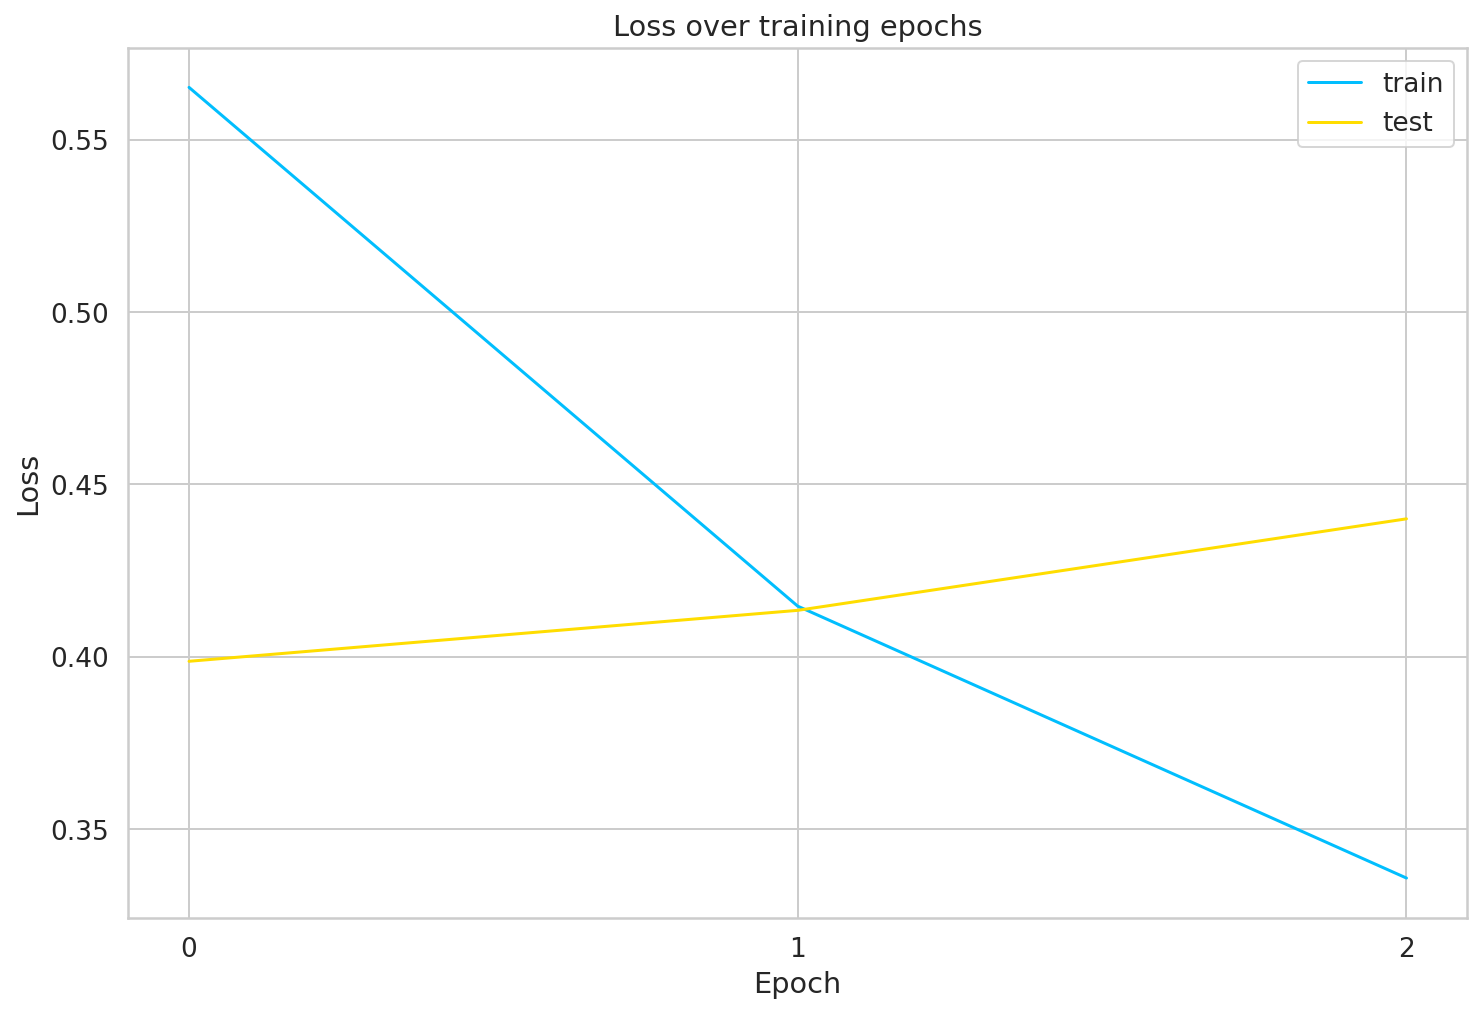

In [43]:
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

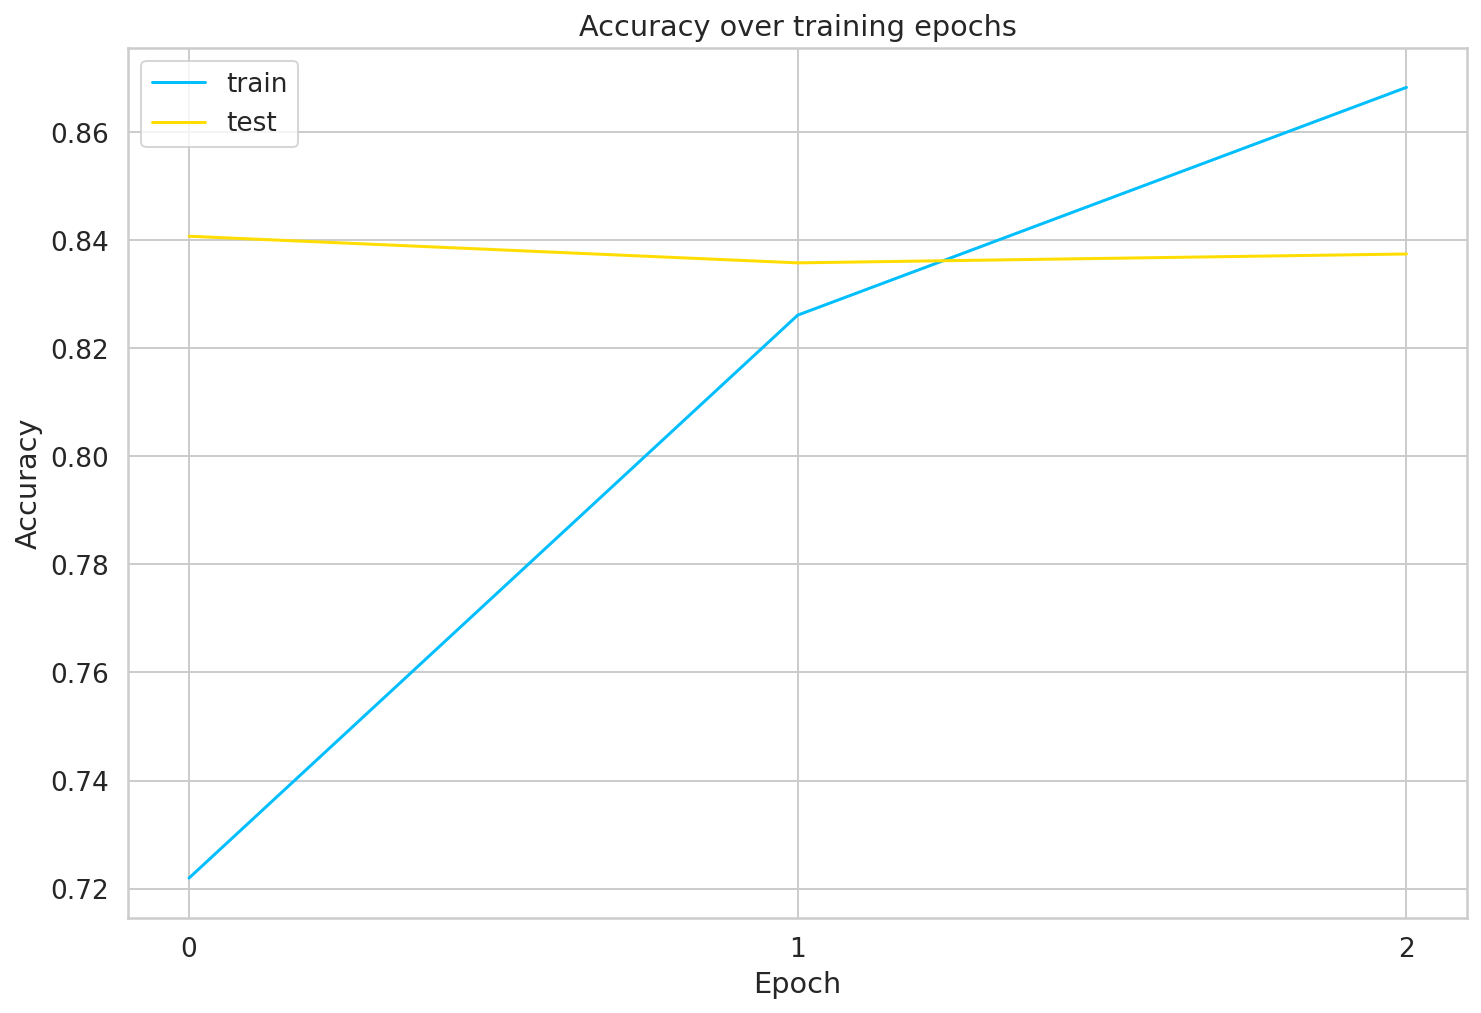

In [44]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [45]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

48/48 [==============================] - 4s 89ms/step - loss: 0.4367 - acc: 0.8352
train acc 0.9008210301399231
test acc 0.8351936936378479


In [46]:
y_pred = model.predict(data.test_x).argmax(axis=-1)
print(classification_report(data.test_y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       658
           1       0.82      0.91      0.86       865

    accuracy                           0.84      1523
   macro avg       0.84      0.82      0.83      1523
weighted avg       0.84      0.84      0.83      1523



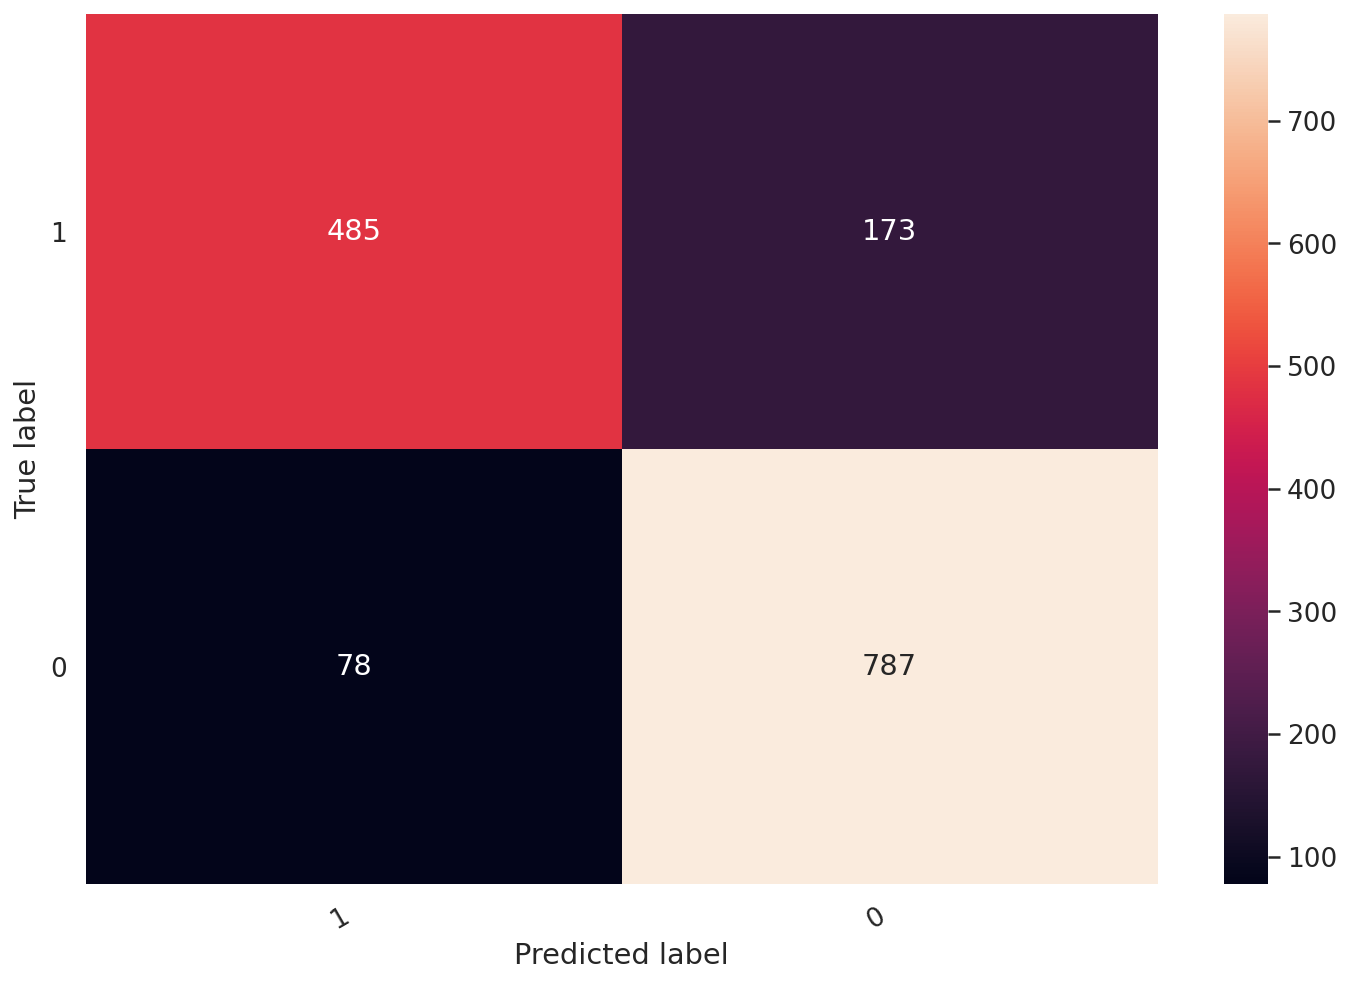

In [47]:
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

### Testing model on Random sentences

In [48]:
sentences = [
  "Just happened a terrible car crash",
    "Heard about #earthquake is different cities, stay safe everyone.",
    "No I don't like cold!",
    "@RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated?"
  ]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = model.predict(pred_token_ids).argmax(axis=-1)

for text, label in zip(sentences, predictions):
    if classes[label]==1:
        target="Disaster Tweet"
        print("text:", text, "\nClass:", target)
        print()
    else:
        target="Normal Tweet"
        print("text:", text, "\nClass:", target)
        print()
        
  

text: Just happened a terrible car crash 
Class: Disaster Tweet

text: Heard about #earthquake is different cities, stay safe everyone. 
Class: Disaster Tweet

text: No I don't like cold! 
Class: Normal Tweet

text: @RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated? 
Class: Normal Tweet



As we can see the model correctly predicted disaster tweets in first two sentences and Normal in last two sentences.